In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import torch
from torch import nn, Tensor
%matplotlib inline

In [54]:
#initialize random image of size 320x240
img = np.random.randint(0, 255, (320, 320, 3), dtype=np.uint8)
# convert to torch
img = torch.from_numpy(img).permute(2, 0, 1).float()

# reshape the image as a batch of a single sample
img = img.unsqueeze(0)

In [55]:
img.shape

torch.Size([1, 3, 320, 320])

In [11]:
a1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
a2 = nn.ReLU(inplace=True)
a3 = nn.MaxPool2d(kernel_size=2, stride=2)
a4 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

In [41]:
b = a1(img)

In [42]:
c = a3(b)

In [43]:
b.shape

torch.Size([1, 16, 320, 240])

In [44]:
c.shape

torch.Size([1, 16, 160, 120])

In [14]:
c.shape

torch.Size([32, 320, 240])

In [45]:
out = torch.flatten(c, 1)

In [46]:
out.shape

torch.Size([1, 307200])

In [50]:
l1 = nn.Linear(16 * 160 * 120, 128)

In [51]:
l1(out).shape

torch.Size([1, 128])

In [67]:
features = nn.Sequential(
			nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=2, stride=2),
			nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=2, stride=2),
			nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=2, stride=2),
		)

In [68]:
head = nn.Sequential(
			nn.Dropout(p=0, inplace=True),
   			nn.Linear(64 * 79 * 79, 128), # image size should be 320x320
			nn.ReLU(inplace=True),
			nn.Linear(128, 128),
			nn.ReLU(inplace=True),
			nn.Linear(128, 4)
		)


In [69]:
x = features(img)

In [70]:
x.shape

torch.Size([1, 64, 40, 40])

In [65]:
x = torch.flatten(x, 1)

In [66]:
x = head(x)

### Histogram Equilization

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# from utils.data_processor import DataProcessor


ModuleNotFoundError: No module named 'matplotlib'

In [19]:
def crop_roi(frame, x, y, w, h):
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    return frame[y:y+h, x:x+w]

In [24]:
data_root = r"/media/weixiong0404/1EDA-4DD0/fyp/dataset"
image_width = 320
image_height = 240
camera_index = 2
category = ["no_objects", "left", "middle", "right", "all" ,"left_mid", "right_mid"]



In [5]:
#get sample image path
table_name = "brown_table"
category = "left"
category_root = os.path.join(data_root, table_name, category)
image_list = os.listdir(category_root)
img_path = os.path.join(category_root, image_list[0])

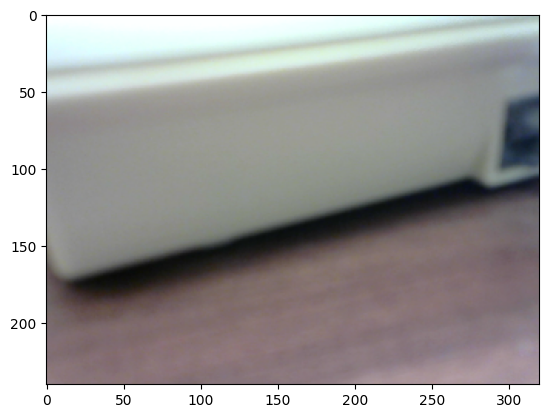

In [9]:
#show image using matplotlib
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

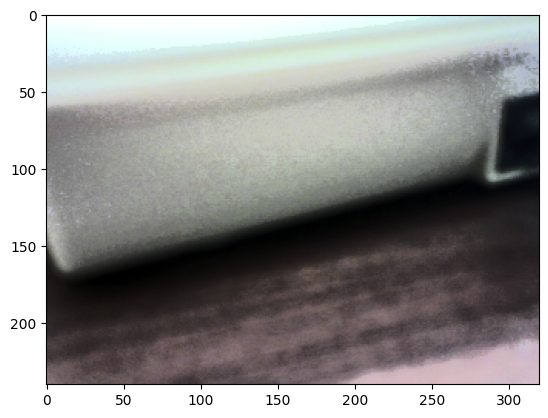

In [10]:
#perform histogram equilization
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img[:,:,2] = cv2.equalizeHist(img[:,:,2])
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
plt.imshow(img)

In [25]:
roi = crop_roi(img, 0, image_height*0.6, image_width, image_height*0.4)

In [23]:
img.shape

(240, 320, 3)

In [26]:
roi.shape

(96, 320, 3)

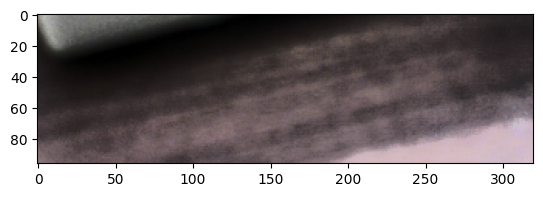

In [27]:
#show roi
plt.imshow(roi)